# About

This notebook contains part of our analyis our team conducted for the Get Better With data hackathon held on November 7,2015.

## Data Source 

[CMS Open Payment](https://www.cms.gov/openpayments/)

Sometimes, doctors and hospitals have financial relationships with health care manufacturing companies. These relationships can include money for research activities, gifts, speaking fees, meals, or travel. The Affordable Care Act requires CMS to collect information from applicable manufacturers and group purchasing organizations (GPOs) in order to report information about their financial relationships with physicians and hospitals. Open Payments is the federally run program that collects the information about these financial relationships and makes it available to you. View the summary data dashboard for an overview of the published data.

# imports

In [45]:
import pymysql
import pandas.io.sql as sql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from IPython.display import IFrame

pylab.rcParams['figure.figsize'] = (25, 10)
%matplotlib inline

In [47]:
!ls

2013		avg_nature_of_payment.csv     speciality_zip_code_count.csv
2014		data_top_specialities.csv     speciality_zip_code_payment.csv
analysis.ipynb	speciality_state_payment.csv  speciality_zipcode_payment.csv


In [48]:
!pwd

/home/jshoun01/get_better_With_data


# Payment by States

In [50]:
user_name='real username'
password='reall password'

In [ ]:
# first connect to the database
cnxn = pymysql.connect(host='health-db-internet.c6clocfz5zxy.us-east-1.rds.amazonaws.com',
                       port=3306,
                       user=user_name,
                       passwd=password)

In [15]:
# For example, let's figure out how much each state paid in 2014 for Allopathic care
sql_command = \
'select distinct(d.Recipient_State), '\
    'avg(d.Total_Amount_of_Payment_USDollars) '\
    'from CMS_open_payments_2013.general_payment_data d '\
    'where d.Physician_Specialty like \'{}\' '\
        'group by d.Physician_Specialty, d.Recipient_State;'.format('%Allopathic%')

# This one line does it all!
print 'starting call to sql'
df = sql.read_sql(sql_command, cnxn)
print '\nfinished processing ask\n'

# now do your favorite pandas stuff..

starting call to sql

finished processing ask



In [16]:
df.head()

,Recipient_State,avg(d.Total_Amount_of_Payment_USDollars)
0,AE,96.205000
1,AK,23.757600
2,AL,48.478980
3,AR,277.375959
4,AZ,131.190127


In [ ]:
g_df

# Top Specialities

In [17]:
sql_command ="""
SELECT Physician_Specialty,sum(Total_Amount_of_Payment_USDollars) as payment
FROM CMS_open_payments_2013.general_payment_data
GROUP by Physician_Specialty
ORDER BY payment DESC

"""

# This one line does it all!
print 'starting call to sql'
top_paid_specialities = sql.read_sql(sql_command, cnxn)
print '\nfinished processing ask\n'


starting call to sql

finished processing ask



In [18]:
len(top_paid_specialities)

512

In [20]:
top_paid_specialities.head(6)

,Physician_Specialty,payment
0,None,2.413504e+08
1,Allopathic & Osteopathic Physicians/ Orthopaed...,1.133461e+08
2,Allopathic & Osteopathic Physicians/ Internal ...,4.767825e+07
3,Allopathic & Osteopathic Physicians/ Internal ...,3.686672e+07
4,Allopathic & Osteopathic Physicians/ Neurologi...,3.040880e+07
5,Other Service Providers/ Specialist,2.877599e+07


get only the first 5 entires   
The first entry is None 

In [21]:
top_paid_specialities['Physician_Specialty'].loc[1:5]

1    Allopathic & Osteopathic Physicians/ Orthopaed...
2    Allopathic & Osteopathic Physicians/ Internal ...
3    Allopathic & Osteopathic Physicians/ Internal ...
4    Allopathic & Osteopathic Physicians/ Neurologi...
5                  Other Service Providers/ Specialist
Name: Physician_Specialty, dtype: object

In [25]:
specialities = list(top_paid_specialities['Physician_Specialty'].loc[1:5])

In [27]:
tuple(specialities)

('Allopathic & Osteopathic Physicians/ Orthopaedic Surgery',
 'Allopathic & Osteopathic Physicians/ Internal Medicine',
 'Allopathic & Osteopathic Physicians/ Internal Medicine/ Cardiovascular Disease',
 'Allopathic & Osteopathic Physicians/ Neurological Surgery',
 'Other Service Providers/ Specialist')

In [30]:
sql_command ='SELECT * '\
'FROM CMS_open_payments_2013.general_payment_data '\
'WHERE Physician_Specialty in {0}'.format(tuple(specialities))

In [31]:
sql_command

"SELECT * FROM CMS_open_payments_2013.general_payment_data WHERE Physician_Specialty in ('Allopathic & Osteopathic Physicians/ Orthopaedic Surgery', 'Allopathic & Osteopathic Physicians/ Internal Medicine', 'Allopathic & Osteopathic Physicians/ Internal Medicine/ Cardiovascular Disease', 'Allopathic & Osteopathic Physicians/ Neurological Surgery', 'Other Service Providers/ Specialist')"

In [85]:
df = sql.read_sql(sql_command, cnxn)

In [86]:
df.head()

,Covered_Recipient_Type,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,Recipient_Primary_Business_Street_Address_Line1,Recipient_Primary_Business_Street_Address_Line2,...,NDC_of_Associated_Covered_Drug_or_Biological3,NDC_of_Associated_Covered_Drug_or_Biological4,NDC_of_Associated_Covered_Drug_or_Biological5,Name_of_Associated_Covered_Device_or_Medical_Supply1,Name_of_Associated_Covered_Device_or_Medical_Supply2,Name_of_Associated_Covered_Device_or_Medical_Supply3,Name_of_Associated_Covered_Device_or_Medical_Supply4,Name_of_Associated_Covered_Device_or_Medical_Supply5,Program_Year,Payment_Publication_Date
0,Covered Recipient Physician,None,None,133635,DONALD,CHURCH,BALFOUR,III,2001 4TH AVE,None,...,None,None,None,None,None,None,None,None,2013,06/30/2015
1,Covered Recipient Physician,None,None,350860,AUGUSTUS,JOHN,RUSH,JR,5323 HARRY HINES BLVD,None,...,None,None,None,None,None,None,None,None,2013,06/30/2015
2,Covered Recipient Physician,None,None,15389,GARY,MITCHELL,OWENS,None,5 PALMER DR,None,...,None,None,None,None,None,None,None,None,2013,06/30/2015
3,Covered Recipient Physician,None,None,15389,GARY,MITCHELL,OWENS,None,5 PALMER DR,None,...,None,None,None,None,None,None,None,None,2013,06/30/2015
4,Covered Recipient Physician,None,None,353401,BARBARA,LEE,PETERLIN,II,4940 EASTERN AVE,None,...,None,None,None,None,None,None,None,None,2013,06/30/2015


In [87]:
len(df)

2345014

In [75]:
len(df)

1021153

In [88]:
df.to_csv('data_top_specialities.csv')

In [32]:
top4_data = pd.read_csv('data_top_specialities.csv')

/home/jshoun01/.virtualenvs/cv27/local/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (8,10,13,15,16,20,21,22,23,34,35,36,39,40,41,42,48,49,50,51,52,53,54,55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


# Analysis on top 4 specialities

## nature of payment

In [33]:
top4_data['Nature_of_Payment_or_Transfer_of_Value'].value_counts()

Food and Beverage                                                                                                                                     2045623
Travel and Lodging                                                                                                                                      97983
Education                                                                                                                                               95436
Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program      55480
Consulting Fee                                                                                                                                          31750
Honoraria                                                                                                                                                8685
Gift                                                

Shorten names of the nature of payments

In [34]:
def shorter_nature_of_payment_name(name):
    if name =='Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program':
        return 'Other servcies'
    elif name =="Compensation for serving as faculty or as a speaker for a non-accredited and noncertified continuing education program":
        return "Non-Accredited faculty services"
    elif name =="Compensation for serving as faculty or as a speaker for an accredited or certified continuing education program":
        return "Accredited faculty services"
    elif name =="Current or prospective ownership or investment interest":
        return "investment"
    else:
        return name

In [35]:
top4_data['payment_nature']=top4_data['Nature_of_Payment_or_Transfer_of_Value'].apply(shorter_nature_of_payment_name)

## clean up physiscian speciality

In [153]:
top4_data['speciality']=top4_data['Physician_Specialty'].apply(lambda x : x.split("/")[-1].strip())

## Distribution ofthe the nature of payment

In [36]:
tmp=top4_data.groupby('payment_nature')['Total_Amount_of_Payment_USDollars'].agg([np.mean,np.std])
tmp=tmp.reset_index()
#tmp.to_csv('avg_nature_of_payment.csv')
tmp.head()

,payment_nature,mean,std
0,Accredited faculty services,2280.540108,4747.970750
1,Charitable Contribution,1010.553836,6412.811519
2,Consulting Fee,1995.982858,5192.288188
3,Education,59.715401,646.368356
4,Entertainment,72.978428,126.731020


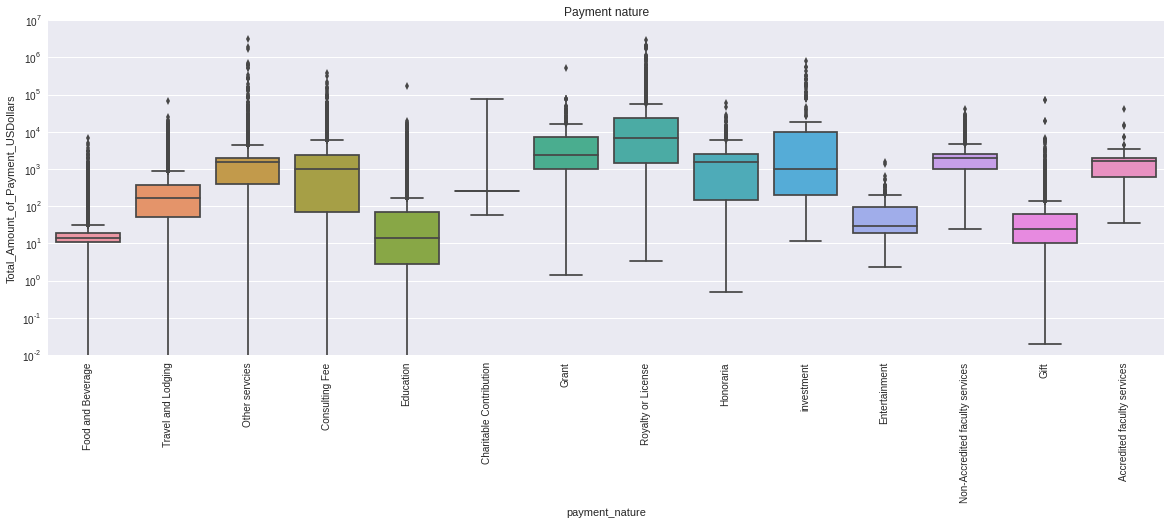

In [37]:
plt.figure(figsize=(20, 6))
g=sns.boxplot(x='payment_nature',y='Total_Amount_of_Payment_USDollars',data=top4_data)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.yscale('log')
plt.title('Payment nature')

## Distribution of payments for the different specialities

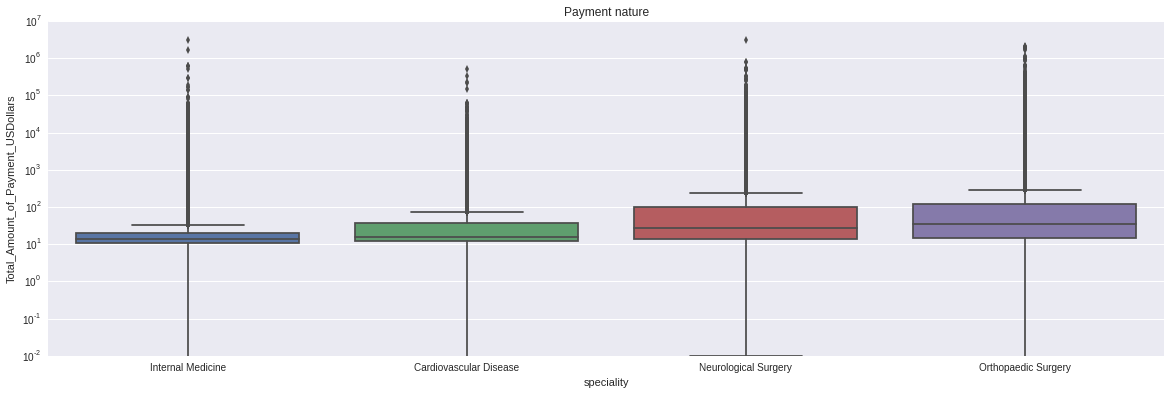

In [155]:
plt.figure(figsize=(20,6))
g=sns.boxplot(x='speciality',y='Total_Amount_of_Payment_USDollars',data=top4_data)
locs, labels = plt.xticks()
#labels=['a','b','c','d']
#plt.setp(labels, rotation=90)
plt.yscale('log')
plt.title('Payment nature')
#plt.xlabel(['a','b','c','d'])

## Distribution of payments for the different specialities (speciality first)

group by physiain first

In [38]:
tmp=top4_data.groupby(['Physician_Specialty','Physician_Profile_ID'])['Total_Amount_of_Payment_USDollars'].agg([np.mean,np.median,np.std])
tmp=tmp.reset_index()
#tmp.to_csv('avg_nature_of_payment.csv')
tmp.head()

,Physician_Specialty,Physician_Profile_ID,mean,median,std
0,Allopathic & Osteopathic Physicians/ Family Me...,7,13.907568,11.89,13.582069
1,Allopathic & Osteopathic Physicians/ Family Me...,9,34.435000,16.88,38.259481
2,Allopathic & Osteopathic Physicians/ Family Me...,10,124.000000,124.00,NaN
3,Allopathic & Osteopathic Physicians/ Family Me...,13,16.929474,16.52,3.526603
4,Allopathic & Osteopathic Physicians/ Family Me...,31,17.674186,13.19,25.892639


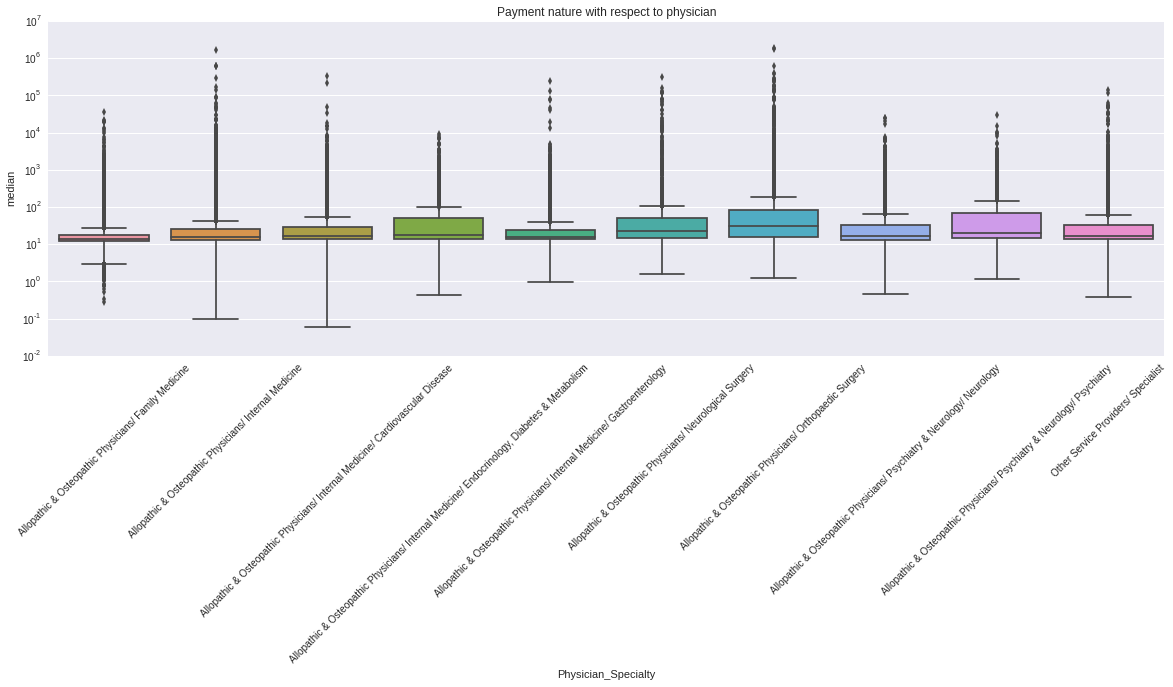

In [39]:
plt.figure(figsize=(20,6))
g=sns.boxplot(x='Physician_Specialty',y='median',data=tmp)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.yscale('log')
plt.title('Payment nature with respect to physician')

# Top physicians

In [40]:
tmp=top4_data.groupby(['Physician_Profile_ID'])['Total_Amount_of_Payment_USDollars'].agg([sum])
tmp=tmp.reset_index()
#tmp.to_csv('avg_nature_of_payment.csv')
total_payment=sum(tmp['sum'])
tmp['ratio']=tmp['sum']/float(total_payment)
tmp.head()

,Physician_Profile_ID,sum,ratio
0,4,170.12,4.513084e-07
1,6,35.77,9.489362e-08
2,7,514.58,1.365120e-06
3,9,137.74,3.654081e-07
4,10,124.00,3.289575e-07


# geocoding

prepare data for carto db     
Get data aggregated by zipcode 

In [198]:
def format_zip_code(x):
    x=str(x)
    x=x.split("-")[0]
    
    return x

In [199]:
top4_data['f_zip_code']= top4_data['Recipient_Zip_Code'].apply(format_zip_code)

In [200]:
top4_data['f_zip_code'].head()

0    92101
1    19342
2    19342
3    19104
4    64111
Name: f_zip_code, dtype: object

In [205]:

tmp=top4_data.groupby(['speciality','f_zip_code'])['Total_Amount_of_Payment_USDollars'].agg([len])
tmp=tmp.reset_index()
tmp.rename(columns={'len':'count'},inplace=True)

In [206]:
tmp.head()

,speciality,f_zip_code,count
0,Cardiovascular Disease,00018,5
1,Cardiovascular Disease,00601,2
2,Cardiovascular Disease,00603,16
3,Cardiovascular Disease,00610,1
4,Cardiovascular Disease,00612,48


In [171]:
len(tmp)

216

In [207]:
tmp.to_csv('speciality_zip_code_count.csv')

In [175]:
len(tmp['Recipient_State'].value_counts())

56

In [204]:
tmp['speciality'].value_counts()

Internal Medicine         13130
Cardiovascular Disease     6595
Orthopaedic Surgery        4756
Neurological Surgery       2262
dtype: int64

In [46]:
IFrame('https://npatta01.cartodb.com/viz/23a5adc8-85a9-11e5-94e6-0ea31932ec1d/embed_map', width=700, height=350)